### 모듈 가져오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns 
import plotly.express as px
from collections import Counter
import matplotlib as mpl
import squarify
from wordcloud import WordCloud


### project_merge_result : 워크넷 + 원티드 + 인크루트

#### 다양한 종류별로 시각화

In [44]:
df = pd.read_csv("/home/kkyu/amr_ws/eda/data/project_merge_result.csv")
df

,기업이름,고용형태,연봉,기업주소,키워드,담당업무,인덱스,필요역량
0,컨트롤웍스,2년,연봉업계평균이상,서울 강남구 언주로81길 13 진일빌딩 3층,자율주행,[2년 이상] 자율주행 Front-End 개발자,1,"['학사', '기획', '자율주행', '웹', '공학', '3D', 'Linux',..."
1,뷰런테크놀로지,-,-,"서초구 강남대로 311, 19층",자율주행,자율주행 인지 개발자,2,"['석사', '학사', '자율주행', '컴퓨터공학', 'computer', 'C',..."
2,씨엔비스,4년,-,"경기도 성남시 수정구 창업로 43, 판교 글로벌비즈센터 A동 907~910호",자율주행,자율주행 인지 개발자,3,"['석사', '자율주행', '논문', 'C', '분석', '딥러닝', '시스템', ..."
3,컨트롤웍스,2년,연봉업계평균이상,서울 강남구 언주로81길 13 진일빌딩 3층,자율주행,자율주행 SW 엔지니어,4,"['공학', '자율주행', '제어', 'C', '딥러닝', '프로젝트', '학위',..."
4,베스텔라랩,2년,연봉업계평균이상,안양시 동안구 엘에스로116번길 118 안양2차 SKV1 Center,자율주행,자율주행 연구원(경기/대구)(전문연구요원가능),5,"['기획', '전공자', '자율주행', 'Embedded', '제어', 'C', '..."
...,...,...,...,...,...,...,...,...
939,딥파인,경력 3~15년,회사내규에 따름,서울 용산구 한강대로30길 25,딥러닝,Visual SLAM(vSLAM) 개발자,940,"['Computer', 'C', '3D', 'Vision', '성능', '최적화',..."
940,다이얼로그디자인에이전시,경력 5~7년,회사내규에 따름,서울 송파구 송파대로 201 A동 1014호,딥러닝,[5년 이상 리더급] 풀스택 소프트웨어 엔지니어,941,"['컴퓨터공학', '웹', '데이터', '시스템', '엔지니어', 'AI', 'Py..."
941,피처링,경력 2~10년,회사내규에 따름,"서울 강남구 테헤란로 419, 15층 (강남파이낸스플라자)",딥러닝,서버 및 백엔드 개발자 채용,942,"['웹', '데이터', '시스템', 'AI', 'Python', '설계']"
942,딥엑스,경력 5~20년,회사내규에 따름,경기 성남시 분당구 판교역로241번길 20 5층,딥러닝,[AI반도체] 딥엑스 SoC ASIC 설계 Engineer,943,"['시스템', 'AI', 'python', '인공지능', 'Linux', '설계']"


### 로봇제어와 로봇 제어 두가지 형태가 존재하므로 하나로 결합

In [45]:
df['키워드'] = df['키워드'].str.replace('로봇제어', '로봇 제어')
df

,기업이름,고용형태,연봉,기업주소,키워드,담당업무,인덱스,필요역량
0,컨트롤웍스,2년,연봉업계평균이상,서울 강남구 언주로81길 13 진일빌딩 3층,자율주행,[2년 이상] 자율주행 Front-End 개발자,1,"['학사', '기획', '자율주행', '웹', '공학', '3D', 'Linux',..."
1,뷰런테크놀로지,-,-,"서초구 강남대로 311, 19층",자율주행,자율주행 인지 개발자,2,"['석사', '학사', '자율주행', '컴퓨터공학', 'computer', 'C',..."
2,씨엔비스,4년,-,"경기도 성남시 수정구 창업로 43, 판교 글로벌비즈센터 A동 907~910호",자율주행,자율주행 인지 개발자,3,"['석사', '자율주행', '논문', 'C', '분석', '딥러닝', '시스템', ..."
3,컨트롤웍스,2년,연봉업계평균이상,서울 강남구 언주로81길 13 진일빌딩 3층,자율주행,자율주행 SW 엔지니어,4,"['공학', '자율주행', '제어', 'C', '딥러닝', '프로젝트', '학위',..."
4,베스텔라랩,2년,연봉업계평균이상,안양시 동안구 엘에스로116번길 118 안양2차 SKV1 Center,자율주행,자율주행 연구원(경기/대구)(전문연구요원가능),5,"['기획', '전공자', '자율주행', 'Embedded', '제어', 'C', '..."
...,...,...,...,...,...,...,...,...
939,딥파인,경력 3~15년,회사내규에 따름,서울 용산구 한강대로30길 25,딥러닝,Visual SLAM(vSLAM) 개발자,940,"['Computer', 'C', '3D', 'Vision', '성능', '최적화',..."
940,다이얼로그디자인에이전시,경력 5~7년,회사내규에 따름,서울 송파구 송파대로 201 A동 1014호,딥러닝,[5년 이상 리더급] 풀스택 소프트웨어 엔지니어,941,"['컴퓨터공학', '웹', '데이터', '시스템', '엔지니어', 'AI', 'Py..."
941,피처링,경력 2~10년,회사내규에 따름,"서울 강남구 테헤란로 419, 15층 (강남파이낸스플라자)",딥러닝,서버 및 백엔드 개발자 채용,942,"['웹', '데이터', '시스템', 'AI', 'Python', '설계']"
942,딥엑스,경력 5~20년,회사내규에 따름,경기 성남시 분당구 판교역로241번길 20 5층,딥러닝,[AI반도체] 딥엑스 SoC ASIC 설계 Engineer,943,"['시스템', 'AI', 'python', '인공지능', 'Linux', '설계']"


### < 키워드 비중 시각화 >

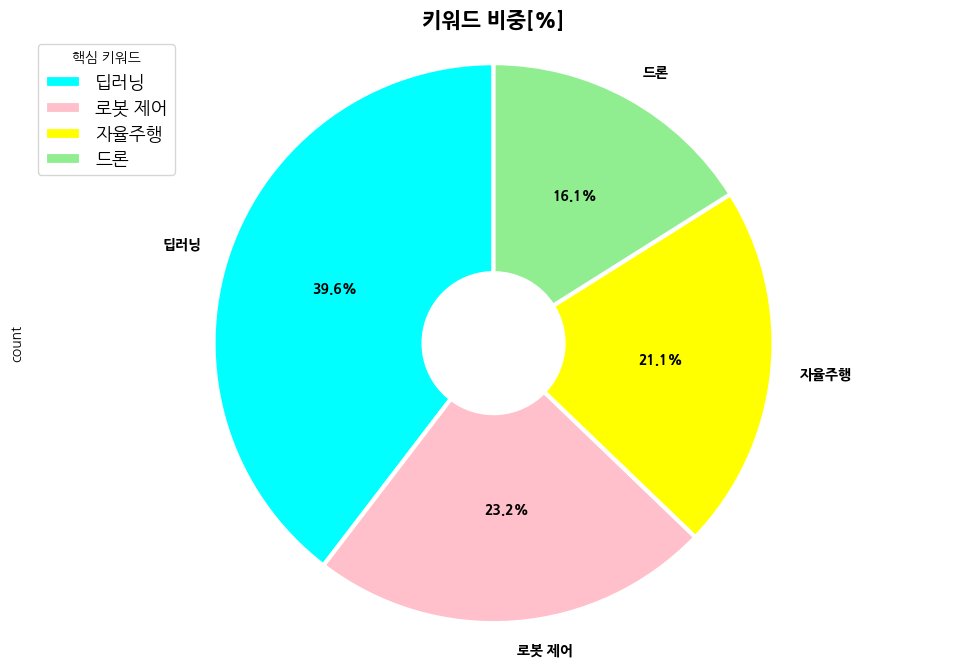

In [4]:
df = pd.read_csv("/home/kkyu/amr_ws/eda/data/project_merge.csv")

df['키워드'] = df['키워드'].str.replace('로봇제어', '로봇 제어')

# 필요한 열을 선택 (예: "필요역량")
keyword= df["키워드"]

# 단어별로 카운트를 세기
skills_counts = pd.Series(keyword).value_counts()

# Pie plot
plt.figure(figsize=(12, 8))
wedgeprops = {'width' : 0.75, 'edgecolor' : 'w', 'linewidth' : 3}
explode = [0.03] * 4
colors = ['aqua', 'pink', 'yellow', 'lightgreen']
skills_counts.plot.pie(autopct='%1.1f%%', startangle=90, textprops = {'size' : 10, 'weight': 'bold'} , wedgeprops = wedgeprops, colors = colors)
plt.title('키워드 비중[%]', size = 15, weight = 'bold')
plt.axis('equal')
plt.legend(loc = 'upper left', fontsize = 13, title = '핵심 키워드')
plt.show()

### <필요역량 빈도수 높은 단어 by Word Cloud >

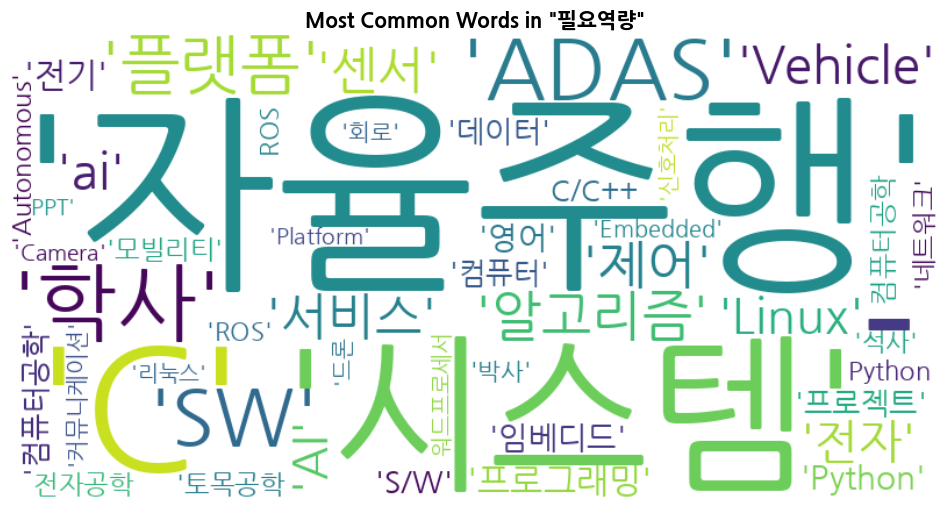

In [5]:
df['필요역량'] = df['필요역량'].replace({'\[\]|\[|\]': ''}, regex=True).str.strip()
words = df['필요역량'].str.split(',').explode().str.strip()
most_common_words = words.value_counts().head(50)

font_path = "/path/to/NanumGothic.ttf" 
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    font_path=font_path,
    min_font_size=10,  
    collocations=False  
).generate_from_frequencies(most_common_words)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Most Common Words in "필요역량"', size=15, weight='bold')
plt.show()


### <필요역량 비중 >
- word cloud에서 추출한 단어 선정 
- pie plot 및 bar plot으로 확인

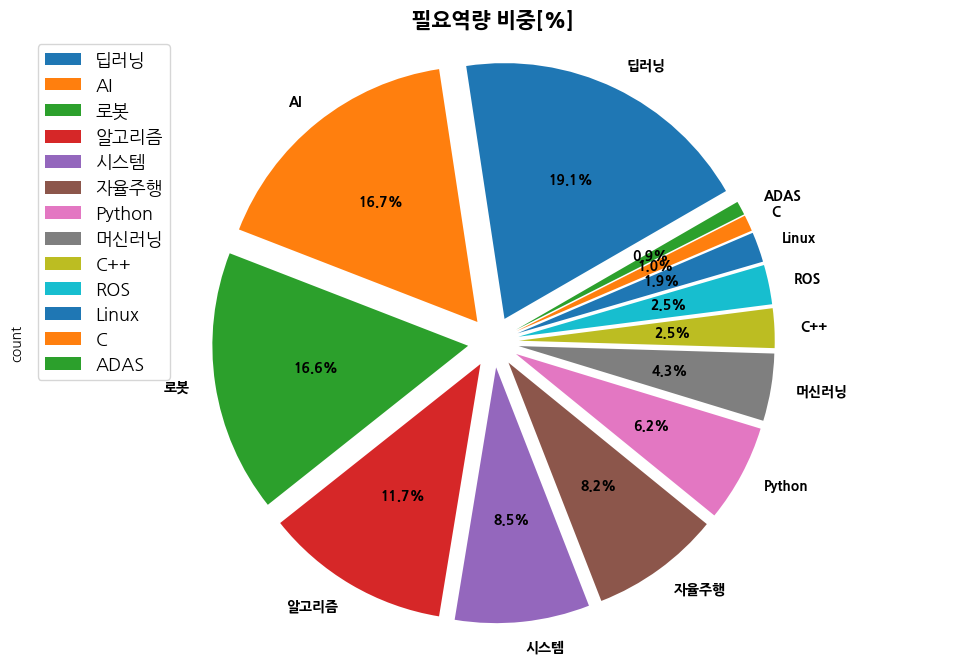

/tmp/ipykernel_14015/1076802135.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=sorted_counts.index, y=sorted_counts.values, palette="viridis")


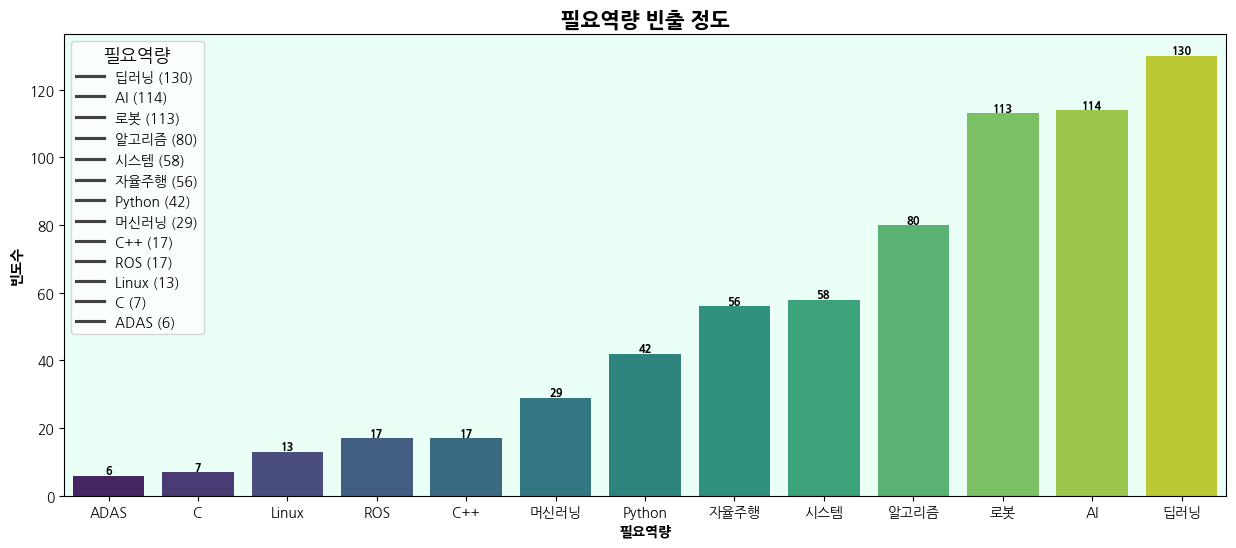

In [6]:
plt.rcParams['font.family'] = 'NanumGothic'

required_skills_column = df["필요역량"]
selected_keywords = ['ROS', 'Python', 'C','C++', 'AI', '딥러닝', '자율주행', '로봇', 'Linux', 'Vehicle', '머신러닝', 'ADAS', '알고리즘', '시스템']

selected_skills = [skill for skills_list in required_skills_column.dropna() for skill in skills_list.split() if skill in selected_keywords]
skills_counts = pd.Series(selected_skills).value_counts()
explode = [0.1] * len(skills_counts)

# Pie plot
plt.figure(figsize=(12, 8))
skills_counts.plot.pie(autopct='%1.1f%%', startangle=30, textprops={'size': 10, 'weight': 'bold'}, explode = explode)
plt.title('필요역량 비중[%]', size=15, weight='bold')
plt.axis('equal')
plt.legend(labels=skills_counts.index, loc='upper left', fontsize=13)  # Adjusted legend
plt.show()

# Bar plot
fig, ax = plt.subplots(figsize=(15, 6))
sorted_counts = skills_counts.sort_values(ascending=True)
bar_plot = sns.barplot(x=sorted_counts.index, y=sorted_counts.values, palette="viridis")

for i, v in enumerate(sorted_counts):
    bar_plot.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8, weight='bold')

ax.set_facecolor('#eafff5')
plt.title('필요역량 빈출 정도', size=15, weight='bold')
plt.xlabel('필요역량', weight='bold')
plt.ylabel('빈도수', weight='bold')

legend_labels = [f"{skill} ({count})" for skill, count in zip(sorted_counts.index[::-1], sorted_counts.values[::-1])]
plt.legend(legend_labels, title="필요역량", title_fontsize='13', loc='upper left')
plt.show()


In [7]:
# '키워드' 컬럼에서 '자율주행'을 포함하는 행만 선택
df = df[['키워드','필요역량']]
df1 = df[df['키워드'].str.contains('자율주행')]
df1

,키워드,필요역량
0,자율주행,"자격요건, 학사 이상 (컴퓨터 공학/감성 및 인간공학 등 전공), 프론트엔드 개발 ..."
1,자율주행,- 2년이상 경력자- C++ 혹은 Python 프로그래밍 능력- 국영문 학술논문 등...
2,자율주행,", 전자전기/컴퓨터공학 학사 이상 또는 이와 비슷한 동종업계 경력, C/C++ 또는..."
3,자율주행,", 관련 분야 학사학위(4년제) 이상, 혹은 유관 분야 경력 2년 이상이신 분, C..."
4,자율주행,- 해당 분야 학사 이상- 해당 개발 경력 2년 이상- ROS 환경에서 개발 경험이...
...,...,...
433,자율주행,"'C', 'AI'"
434,자율주행,"'네트워크', 'AI', '시스템', 'Python', '프로그래밍', '영어', ..."
435,자율주행,
436,자율주행,"'자율주행', 'Embedded', 'Linux', '센서퓨전', 'firmware..."


In [ ]:
df1['필요역량'].unique()

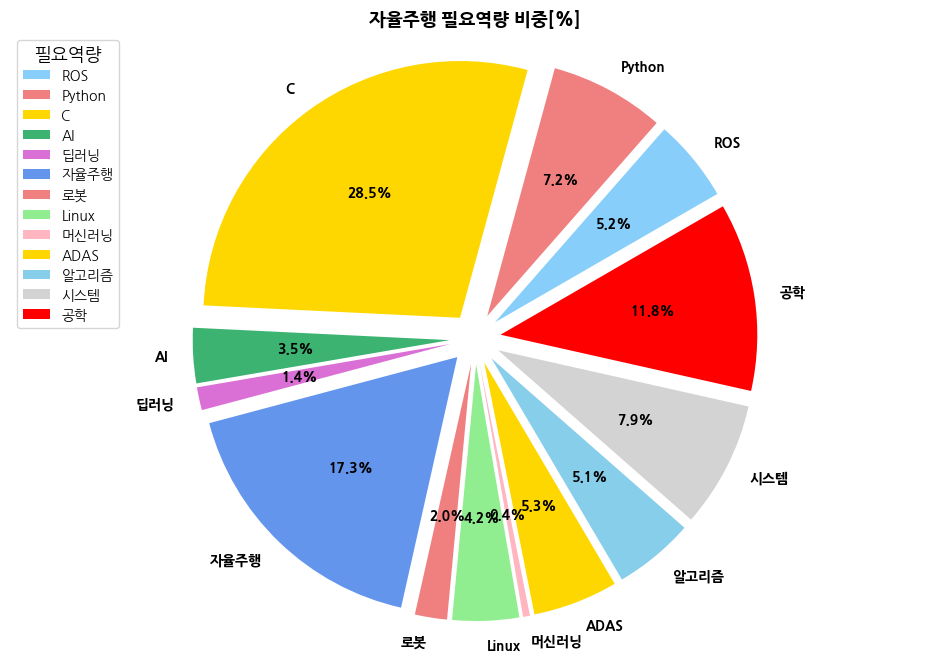

In [41]:
import matplotlib.pyplot as plt

# 주어진 조건을 만족하는 DataFrame 생성
df_c_cpp = df1[df1['필요역량'].str.contains('C|ROS|Python|AI|딥러닝|자율주행|로봇|Linux|머신러닝|ADAS|알고리즘|시스템|공학', case=False, regex=True)]

# 'C'와 'C++'이 얼마나 들어있는지 카운트
count_c = df_c_cpp['필요역량'].str.count('C').sum()
count_ros = df_c_cpp['필요역량'].str.count('ROS').sum()
count_p = df_c_cpp['필요역량'].str.count('Python').sum()
count_ai = df_c_cpp['필요역량'].str.count('AI').sum()
count_d = df_c_cpp['필요역량'].str.count('딥러닝').sum()
count_a = df_c_cpp['필요역량'].str.count('자율주행').sum()
count_r = df_c_cpp['필요역량'].str.count('로봇').sum()
count_L = df_c_cpp['필요역량'].str.count('Linux').sum()
count_m = df_c_cpp['필요역량'].str.count('머신러닝').sum()
count_ad = df_c_cpp['필요역량'].str.count('ADAS').sum()
count_al = df_c_cpp['필요역량'].str.count('알고리즘').sum()
count_sy = df_c_cpp['필요역량'].str.count('시스템').sum()
count_en = df_c_cpp['필요역량'].str.count('공학').sum()

# Pie plot 생성
labels = ['ROS', 'Python', 'C', 'AI', '딥러닝', '자율주행', '로봇', 'Linux', '머신러닝', 'ADAS', '알고리즘', '시스템','공학']
sizes = [count_ros, count_p, count_c, count_ai, count_d, count_a, count_r, count_L, count_m, count_ad, count_al, count_sy,count_en]
colors = ['lightskyblue', 'lightcoral', 'gold', 'mediumseagreen', 'orchid', 'cornflowerblue', 'lightcoral', 'lightgreen', 'lightpink', 'gold', 'skyblue', 'lightgray','red']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.1)

plt.figure(figsize=(12, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=30, textprops={'size': 10, 'weight': 'bold'}, explode=explode)
plt.title('자율주행 필요역량 비중[%]', size=13, weight='bold')
plt.axis('equal')
plt.legend(labels, title="필요역량", title_fontsize='13', loc='upper left')
plt.show()


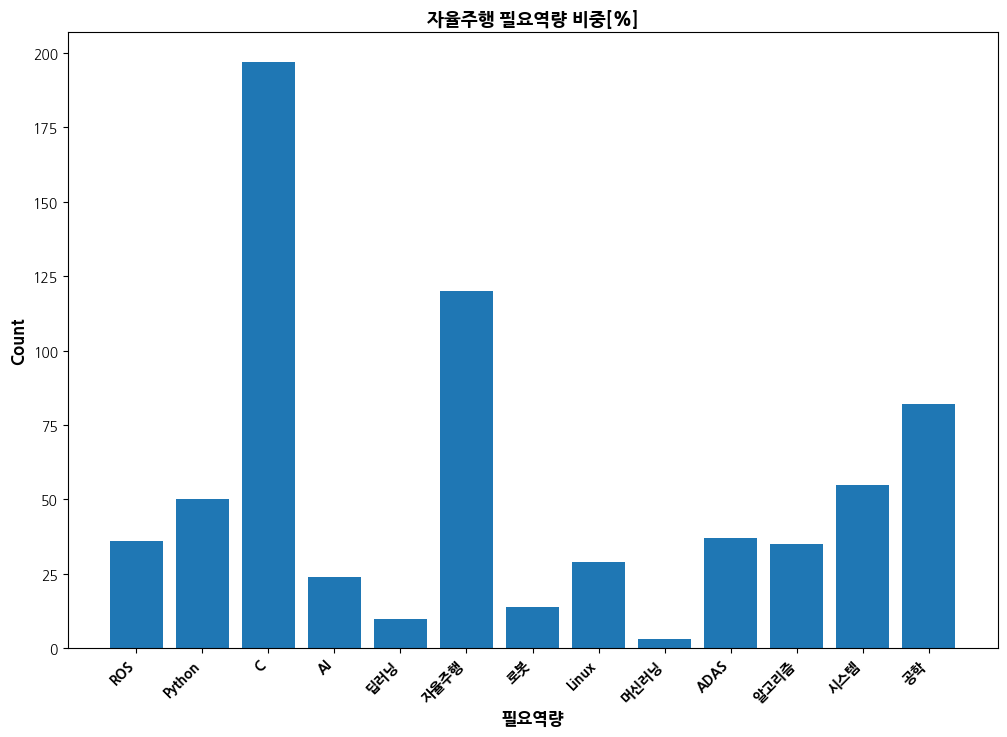

In [40]:
# 주어진 조건을 만족하는 DataFrame 생성
df_c_cpp = df1[df1['필요역량'].str.contains('C|ROS|Python|AI|딥러닝|자율주행|로봇|Linux|머신러닝|ADAS|알고리즘|시스템|공학', case=False, regex=True)]

# 'C'와 'C++'이 얼마나 들어있는지 카운트
count_c = df_c_cpp['필요역량'].str.count('C').sum()
count_ros = df_c_cpp['필요역량'].str.count('ROS').sum()
count_p = df_c_cpp['필요역량'].str.count('Python').sum()
count_ai = df_c_cpp['필요역량'].str.count('AI').sum()
count_d = df_c_cpp['필요역량'].str.count('딥러닝').sum()
count_a = df_c_cpp['필요역량'].str.count('자율주행').sum()
count_r = df_c_cpp['필요역량'].str.count('로봇').sum()
count_L = df_c_cpp['필요역량'].str.count('Linux').sum()
count_m = df_c_cpp['필요역량'].str.count('머신러닝').sum()
count_ad = df_c_cpp['필요역량'].str.count('ADAS').sum()
count_al = df_c_cpp['필요역량'].str.count('알고리즘').sum()
count_sy = df_c_cpp['필요역량'].str.count('시스템').sum()
count_en = df_c_cpp['필요역량'].str.count('공학').sum()

counts = [count_ros, count_p, count_c, count_ai, count_d, count_a, count_r, count_L, count_m, count_ad, count_al, count_sy,count_en]

# Bar plot 생성
plt.figure(figsize=(12, 8))
plt.bar(labels, counts)
plt.title('자율주행 필요역량 비중[%]', size=13, weight='bold')
plt.xlabel('필요역량', fontsize=12, weight='bold')
plt.ylabel('Count', fontsize=12, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10, weight='bold')
plt.show()


In [46]:
# '키워드' 컬럼에서 '자율주행'을 포함하는 행만 선택
df = df[['키워드','필요역량']]
df2 = df[df['키워드'].str.contains('드론')]
df2

,키워드,필요역량
22,드론,"['학습', 'AI', 'S/W']"
96,드론,[]
97,드론,[]
98,드론,[]
99,드론,"['SW', '드론']"
...,...,...
739,드론,"['C', 'linux', '분석', '프로젝트', '최적화', '통신', 'AI'..."
740,드론,"['C', 'C++', '전공자', '석사']"
741,드론,"['회로', '드론', '분석', '로봇', '경험을', '설계']"
742,드론,"['Embedded', '드론', 'C', '개선', '데이터', '로봇', '영상..."


In [ ]:
df2['필요역량'].unique()

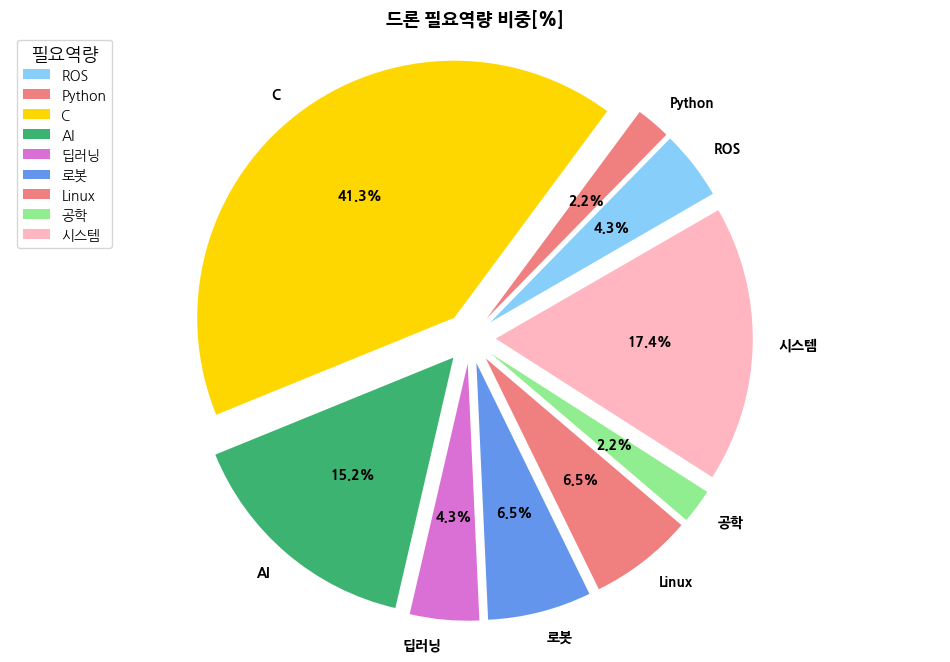

In [58]:
import matplotlib.pyplot as plt

# 주어진 조건을 만족하는 DataFrame 생성
df_c_cpp = df2[df2['필요역량'].str.contains('C|ROS|Python|AI|딥러닝|자율주행|로봇|Linux|ADAS|공학|시스템', case=False, regex=True)]

# 'C'와 'C++'이 얼마나 들어있는지 카운트
count_c = df_c_cpp['필요역량'].str.count('C').sum()
count_ros = df_c_cpp['필요역량'].str.count('ROS').sum()
count_p = df_c_cpp['필요역량'].str.count('Python').sum()
count_ai = df_c_cpp['필요역량'].str.count('AI').sum()
count_d = df_c_cpp['필요역량'].str.count('딥러닝').sum()
count_a = df_c_cpp['필요역량'].str.count('자율주행').sum()
count_r = df_c_cpp['필요역량'].str.count('로봇').sum()
count_L = df_c_cpp['필요역량'].str.count('Linux').sum()
count_ad = df_c_cpp['필요역량'].str.count('ADAS').sum()
count_al = df_c_cpp['필요역량'].str.count('공학').sum()
count_sy = df_c_cpp['필요역량'].str.count('시스템').sum()

# Pie plot 생성
labels = ['ROS', 'Python', 'C', 'AI', '딥러닝', '로봇', 'Linux', '공학', '시스템']
sizes = [count_ros, count_p, count_c, count_ai, count_d, count_r, count_L ,count_al, count_sy]
colors = ['lightskyblue', 'lightcoral', 'gold', 'mediumseagreen', 'orchid', 'cornflowerblue', 'lightcoral', 'lightgreen', 'lightpink']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

plt.figure(figsize=(12, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=30, textprops={'size': 10, 'weight': 'bold'}, explode=explode)
plt.title('드론 필요역량 비중[%]', size=13, weight='bold')
plt.axis('equal')
plt.legend(labels, title="필요역량", title_fontsize='13', loc='upper left')
plt.show()


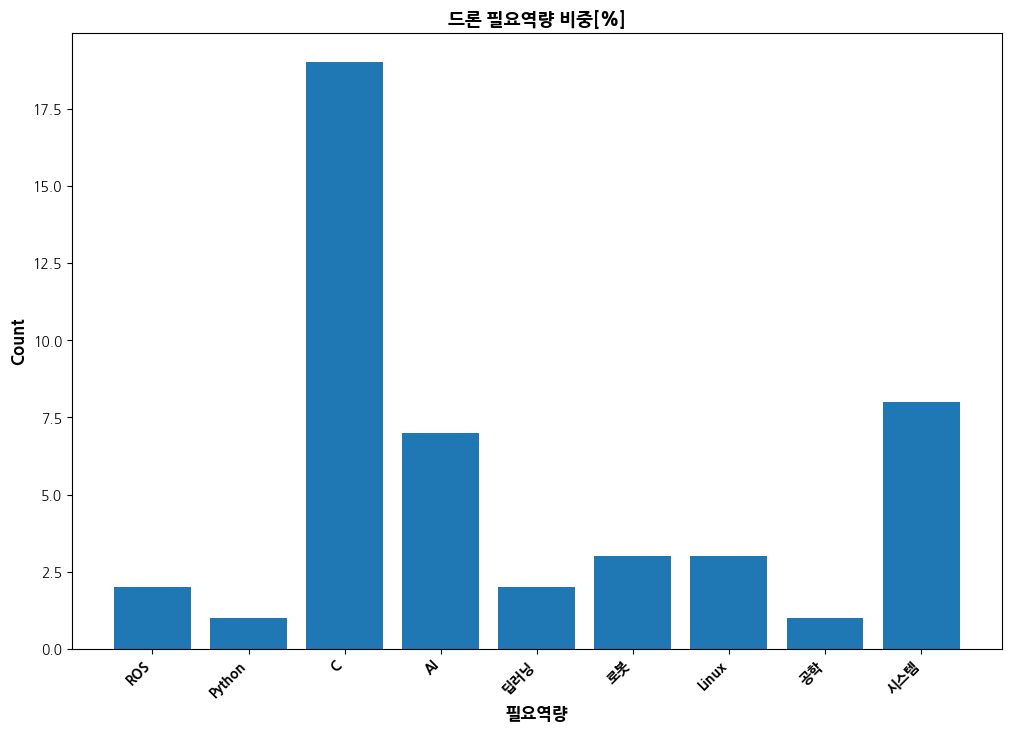

In [59]:
import matplotlib.pyplot as plt

# 주어진 조건을 만족하는 DataFrame 생성
df_c_cpp = df2[df2['필요역량'].str.contains('C|ROS|Python|AI|딥러닝|자율주행|로봇|Linux|ADAS|공학|시스템', case=False, regex=True)]

# 'C'와 'C++'이 얼마나 들어있는지 카운트
count_c = df_c_cpp['필요역량'].str.count('C').sum()
count_ros = df_c_cpp['필요역량'].str.count('ROS').sum()
count_p = df_c_cpp['필요역량'].str.count('Python').sum()
count_ai = df_c_cpp['필요역량'].str.count('AI').sum()
count_d = df_c_cpp['필요역량'].str.count('딥러닝').sum()
count_a = df_c_cpp['필요역량'].str.count('자율주행').sum()
count_r = df_c_cpp['필요역량'].str.count('로봇').sum()
count_L = df_c_cpp['필요역량'].str.count('Linux').sum()
count_ad = df_c_cpp['필요역량'].str.count('ADAS').sum()
count_al = df_c_cpp['필요역량'].str.count('공학').sum()
count_sy = df_c_cpp['필요역량'].str.count('시스템').sum()

# Bar plot 생성
labels = ['ROS', 'Python', 'C', 'AI', '딥러닝', '로봇', 'Linux', '공학', '시스템']
counts = [count_ros, count_p, count_c, count_ai, count_d, count_r, count_L ,count_al, count_sy]

# Bar plot 생성
plt.figure(figsize=(12, 8))
plt.bar(labels, counts)
plt.title('드론 필요역량 비중[%]', size=13, weight='bold')
plt.xlabel('필요역량', fontsize=12, weight='bold')
plt.ylabel('Count', fontsize=12, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10, weight='bold')
plt.show()


In [12]:
# '키워드' 컬럼에서 '자율주행'을 포함하는 행만 선택
df = df[['키워드','필요역량']]
df3 = df[df['키워드'].str.contains('딥러닝')]
df3

,키워드,필요역량
59,딥러닝,"■ 이런 분과 함께하고 싶습니다- 풍부한 SI 영업, AI 솔루션 영업 경험이 있으..."
60,딥러닝,"+ 인공지능 및 머신러닝 연구 개발 경험+ Python, Pytorch, Tenso..."
61,딥러닝,- OCR 시스템의 구조를 알고 이를 딥러닝 모형으로 구현이 가능하신 분- 딥러닝 ...
62,딥러닝,", 학력 : 석사 이상, 딥러닝, 머신러닝에 대한 깊은 이해를 기반으로 한 AI 서..."
63,딥러닝,■ 자격요건- Computer vision 또는 Machine learning 관련...
...,...,...
904,딥러닝,"'OpenCVC++PythonC', '• 최적화 연구기술을 활용한 자사서비스 개발 ..."
905,딥러닝,'GCPGitDjangoReactAWSFlaskPythonAZUREDockerFlu...
906,딥러닝,'GCPAI/인공지능BigDataMachineLearningJavaAWSPython...
907,딥러닝,"'LinuxShellPythonVerilog', '• RTL synthesis, S..."


In [ ]:
df3['필요역량'].unique()

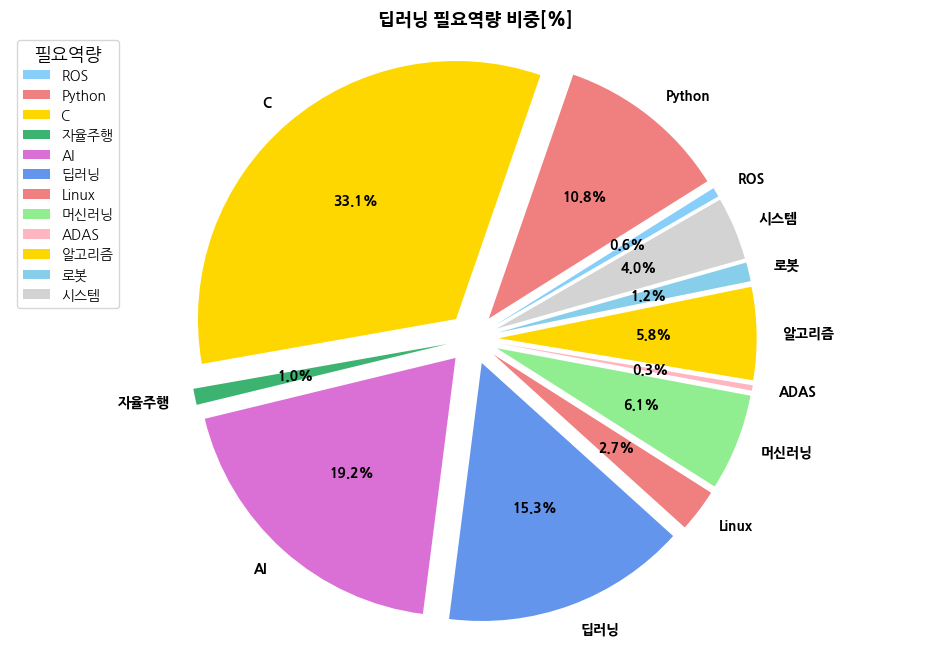

In [14]:
import matplotlib.pyplot as plt

# 주어진 조건을 만족하는 DataFrame 생성
df_c_cpp = df3[df3['필요역량'].str.contains('C|ROS|Python|AI|딥러닝|자율주행|로봇|Linux|머신러닝|ADAS|알고리즘|시스템', case=False, regex=True)]

# 'C'와 'C++'이 얼마나 들어있는지 카운트
count_c = df_c_cpp['필요역량'].str.count('C').sum()
count_ros = df_c_cpp['필요역량'].str.count('ROS').sum()
count_p = df_c_cpp['필요역량'].str.count('Python').sum()
count_ai = df_c_cpp['필요역량'].str.count('AI').sum()
count_d = df_c_cpp['필요역량'].str.count('딥러닝').sum()
count_a = df_c_cpp['필요역량'].str.count('자율주행').sum()
count_r = df_c_cpp['필요역량'].str.count('로봇').sum()
count_L = df_c_cpp['필요역량'].str.count('Linux').sum()
count_m = df_c_cpp['필요역량'].str.count('머신러닝').sum()
count_ad = df_c_cpp['필요역량'].str.count('ADAS').sum()
count_al = df_c_cpp['필요역량'].str.count('알고리즘').sum()
count_sy = df_c_cpp['필요역량'].str.count('시스템').sum()

# Pie plot 생성
labels = ['ROS', 'Python', 'C','자율주행', 'AI', '딥러닝', 'Linux', '머신러닝', 'ADAS', '알고리즘','로봇', '시스템']
sizes = [count_ros, count_p,count_c,count_a, count_ai, count_d, count_L, count_m, count_ad, count_al,count_r, count_sy]
colors = ['lightskyblue', 'lightcoral', 'gold', 'mediumseagreen', 'orchid', 'cornflowerblue', 'lightcoral', 'lightgreen', 'lightpink', 'gold', 'skyblue', 'lightgray']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

plt.figure(figsize=(12, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=30, textprops={'size': 10, 'weight': 'bold'}, explode=explode)
plt.title('딥러닝 필요역량 비중[%]', size=13, weight='bold')
plt.axis('equal')
plt.legend(labels, title="필요역량", title_fontsize='13', loc='upper left')
plt.show()


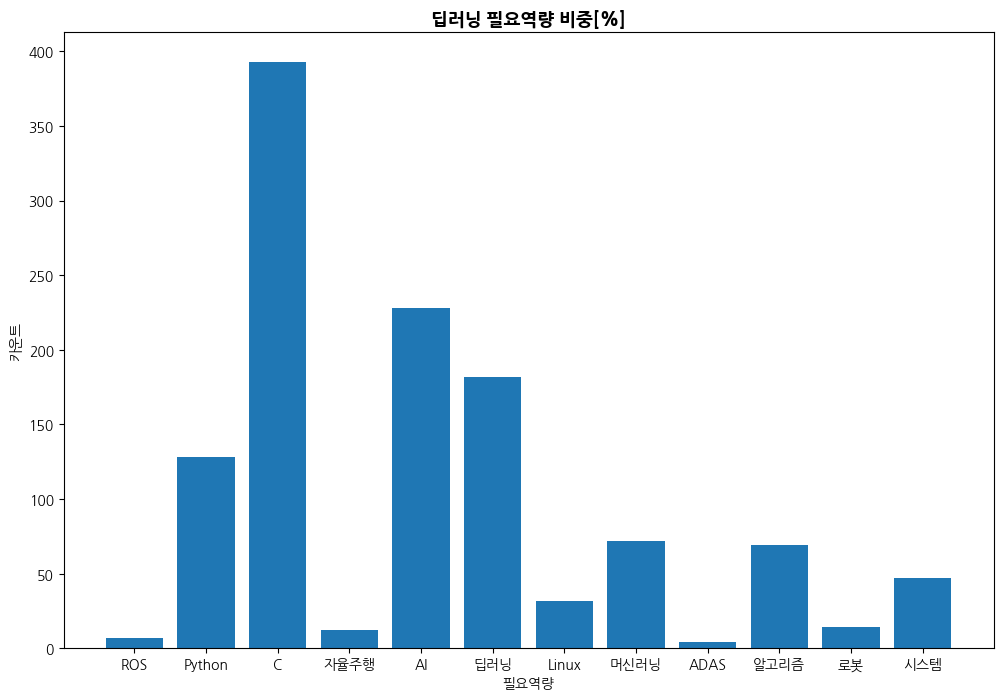

In [55]:
import matplotlib.pyplot as plt

# 주어진 조건을 만족하는 DataFrame 생성
df_c_cpp = df3[df3['필요역량'].str.contains('C|ROS|Python|AI|딥러닝|자율주행|로봇|Linux|머신러닝|ADAS|알고리즘|시스템', case=False, regex=True)]

# 'C'와 'C++'이 얼마나 들어있는지 카운트
count_c = df_c_cpp['필요역량'].str.count('C').sum()
count_ros = df_c_cpp['필요역량'].str.count('ROS').sum()
count_p = df_c_cpp['필요역량'].str.count('Python').sum()
count_ai = df_c_cpp['필요역량'].str.count('AI').sum()
count_d = df_c_cpp['필요역량'].str.count('딥러닝').sum()
count_a = df_c_cpp['필요역량'].str.count('자율주행').sum()
count_r = df_c_cpp['필요역량'].str.count('로봇').sum()
count_L = df_c_cpp['필요역량'].str.count('Linux').sum()
count_m = df_c_cpp['필요역량'].str.count('머신러닝').sum()
count_ad = df_c_cpp['필요역량'].str.count('ADAS').sum()
count_al = df_c_cpp['필요역량'].str.count('알고리즘').sum()
count_sy = df_c_cpp['필요역량'].str.count('시스템').sum()

# Bar plot 생성
labels = ['ROS', 'Python', 'C','자율주행', 'AI', '딥러닝', 'Linux', '머신러닝', 'ADAS', '알고리즘','로봇', '시스템']
counts = [count_ros, count_p, count_c, count_a, count_ai, count_d, count_L, count_m, count_ad, count_al, count_r, count_sy]

plt.figure(figsize=(12, 8))
plt.bar(labels, counts)
plt.title('딥러닝 필요역량 비중[%]', size=13, weight='bold')
plt.xlabel('필요역량')
plt.ylabel('카운트')
plt.show()


In [15]:
# '키워드' 컬럼에서 '자율주행'을 포함하는 행만 선택
df = df[['키워드','필요역량']]
df4 = df[df['키워드'].str.contains('로봇 제어')]
df4

,키워드,필요역량
45,로봇 제어,", 경력 2년 이상이신 분, 컴퓨터공학, 메카트로닉스 전공 선호, 해외 여행에 결격..."
46,로봇 제어,", 로보틱스/메카트로닉스/기계공학/전기전자공학 등 이 · 공 계열 학석사 이상 또는..."
47,로봇 제어,- 전기/전자/컴퓨터/로봇 또는 관련학과 학사 이상- C/C++ 가능자- 이동 로봇...
48,로봇 제어,", 경력 무관, Robot Engineering / Mechanical Engine..."
49,로봇 제어,", 임베디드 시스템 환경 하, C/C++ 코드 구현, Mobile Platform ..."
...,...,...
756,로봇 제어,"'C++ARMEmbedded LinuxEmbeddedFPGAC', '• 원활한 커뮤..."
757,로봇 제어,"'ARMFWMCUEmbeddedC', '• MCU, C프로그래밍 개발 경험자\n• ..."
758,로봇 제어,"'ARMC++FWEmbedded LinuxEmbeddedFPGAC', '• 열린 마음'"
759,로봇 제어,"'AI/인공지능', '• 메이커사 기술 경력자: EPSON, Panasonic, C..."


In [ ]:
df4['필요역량'].unique()

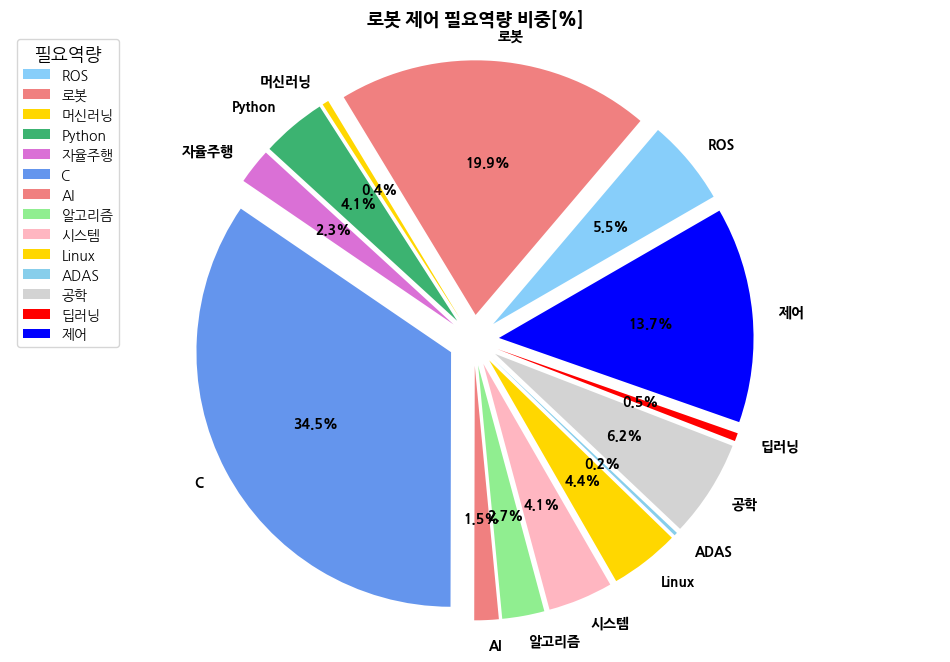

In [17]:
import matplotlib.pyplot as plt

# 주어진 조건을 만족하는 DataFrame 생성
df_c_cpp = df4[df4['필요역량'].str.contains('C|ROS|Python|AI|딥러닝|자율주행|로봇|Linux|머신러닝|ADAS|알고리즘|시스템|공학|제어', case=False, regex=True)]

# 'C'와 'C++'이 얼마나 들어있는지 카운트
count_c = df_c_cpp['필요역량'].str.count('C').sum()
count_ros = df_c_cpp['필요역량'].str.count('ROS').sum()
count_p = df_c_cpp['필요역량'].str.count('Python').sum()
count_ai = df_c_cpp['필요역량'].str.count('AI').sum()
count_d = df_c_cpp['필요역량'].str.count('딥러닝').sum()
count_a = df_c_cpp['필요역량'].str.count('자율주행').sum()
count_r = df_c_cpp['필요역량'].str.count('로봇').sum()
count_L = df_c_cpp['필요역량'].str.count('Linux').sum()
count_m = df_c_cpp['필요역량'].str.count('머신러닝').sum()
count_ad = df_c_cpp['필요역량'].str.count('ADAS').sum()
count_al = df_c_cpp['필요역량'].str.count('알고리즘').sum()
count_sy = df_c_cpp['필요역량'].str.count('시스템').sum()
count_sg= df_c_cpp['필요역량'].str.count('공학').sum()
count_cd= df_c_cpp['필요역량'].str.count('제어').sum()

# Pie plot 생성
labels = ['ROS', '로봇','머신러닝','Python', '자율주행', 'C', 'AI', '알고리즘', '시스템','Linux','ADAS','공학','딥러닝','제어']
sizes = [count_ros,count_r,count_m, count_p,count_a, count_c, count_ai, count_al, count_sy,count_L,count_ad,count_sg,count_d,count_cd]
colors = ['lightskyblue', 'lightcoral', 'gold', 'mediumseagreen', 'orchid', 'cornflowerblue', 'lightcoral', 'lightgreen', 'lightpink', 'gold', 'skyblue', 'lightgray','red','blue']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.1,0.1)

plt.figure(figsize=(12, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=30, textprops={'size': 10, 'weight': 'bold'}, explode=explode)
plt.title('로봇 제어 필요역량 비중[%]', size=13, weight='bold')
plt.axis('equal')
plt.legend(labels, title="필요역량", title_fontsize='13', loc='upper left')
plt.show()


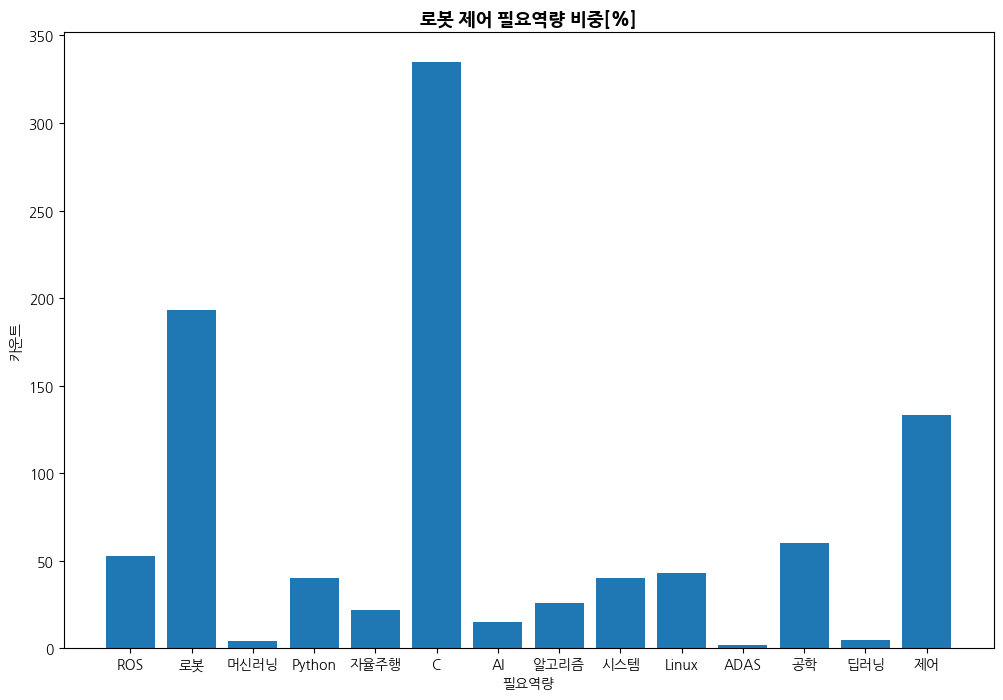

In [60]:
import matplotlib.pyplot as plt

# 주어진 조건을 만족하는 DataFrame 생성
df_c_cpp = df4[df4['필요역량'].str.contains('C|ROS|Python|AI|딥러닝|자율주행|로봇|Linux|머신러닝|ADAS|알고리즘|시스템|공학|제어', case=False, regex=True)]

# 'C'와 'C++'이 얼마나 들어있는지 카운트
count_c = df_c_cpp['필요역량'].str.count('C').sum()
count_ros = df_c_cpp['필요역량'].str.count('ROS').sum()
count_p = df_c_cpp['필요역량'].str.count('Python').sum()
count_ai = df_c_cpp['필요역량'].str.count('AI').sum()
count_d = df_c_cpp['필요역량'].str.count('딥러닝').sum()
count_a = df_c_cpp['필요역량'].str.count('자율주행').sum()
count_r = df_c_cpp['필요역량'].str.count('로봇').sum()
count_L = df_c_cpp['필요역량'].str.count('Linux').sum()
count_m = df_c_cpp['필요역량'].str.count('머신러닝').sum()
count_ad = df_c_cpp['필요역량'].str.count('ADAS').sum()
count_al = df_c_cpp['필요역량'].str.count('알고리즘').sum()
count_sy = df_c_cpp['필요역량'].str.count('시스템').sum()
count_sg= df_c_cpp['필요역량'].str.count('공학').sum()
count_cd= df_c_cpp['필요역량'].str.count('제어').sum()

# Bar plot 생성
labels = ['ROS', '로봇','머신러닝','Python', '자율주행', 'C', 'AI', '알고리즘', '시스템','Linux','ADAS','공학','딥러닝','제어']
counts = [count_ros,count_r,count_m, count_p,count_a, count_c, count_ai, count_al, count_sy,count_L,count_ad,count_sg,count_d,count_cd]

plt.figure(figsize=(12, 8))
plt.bar(labels, counts)
plt.title('로봇 제어 필요역량 비중[%]', size=13, weight='bold')
plt.xlabel('필요역량')
plt.ylabel('카운트')
plt.show()


### < 필요역량 빈출정도 by squarify treemap>

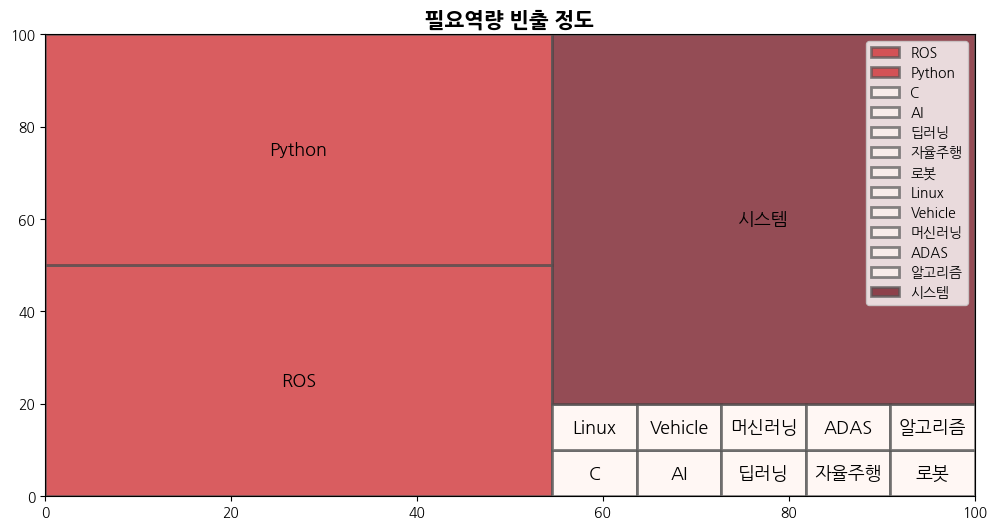

In [18]:
keyword_counts = Counter(' '.join(df['필요역량']).split(','))

selected_keywords = ['ROS', 'Python','C', 'AI', '딥러닝', '자율주행', '로봇', 'Linux', 'Vehicle', '머신러닝', 'ADAS', '알고리즘', '시스템']
selected_keyword_counts = {keyword: keyword_counts[keyword] for keyword in selected_keywords}

# 색상 매핑을 위한 정규화 설정
norm = mpl.colors.Normalize(vmin=min(selected_keyword_counts.values()), vmax=max(selected_keyword_counts.values()))
# 정규화된 값에 기반한 색상 생성
colors = [mpl.cm.Reds(norm(value)) for value in selected_keyword_counts.values()]

fig, ax = plt.subplots(figsize=(12, 6))
sizes = [max(0.1, value) for value in selected_keyword_counts.values()]

# squarify 라이브러리를 사용하여 트리맵 생성
squarify.plot(label=selected_keyword_counts.keys(),
              sizes=sizes,
              color=colors,
              bar_kwargs=dict(linewidth=2, edgecolor="#555"),
              alpha=.7,
              ax=ax, text_kwargs = {'fontsize' : 13})

ax.set_title('필요역량 빈출 정도', size = 15, weight = 'bold')
ax.legend()
plt.show()

### < 키워드 빈출정도 by plotly treemap >

In [19]:
df['키워드'] = df['키워드'].replace('로봇제어', '로봇 제어')

keyword_counts = df['키워드'].value_counts()

df_plotly = pd.DataFrame({'키워드': keyword_counts.index, 'Count': keyword_counts.values})

fig = px.treemap(df_plotly, path=['키워드'], values='Count',
                 color='Count', color_continuous_scale='reds',
                 title='키워드 빈출 정도')
fig.show()

### < 키워드별 고용 형태 분포 by plotly treemap >

In [25]:
df['키워드'] = df['키워드'].replace('로봇제어', '로봇 제어')

filtered_df = df[df['고용형태'].isin(['신입', '신입/경력', '경력','경력무관'])]

keyword_counts = filtered_df.groupby(['키워드', '고용형태']).size().reset_index(name='Count')

df_plotly = pd.DataFrame({'키워드': keyword_counts['키워드'], '고용형태': keyword_counts['고용형태'], 'Count': keyword_counts['Count']})

fig = px.treemap(df_plotly, path=['키워드', '고용형태'], values='Count',
                 color='Count', color_continuous_scale='reds',
                 title='키워드별 고용 형태 분포')
fig.update_layout(
    title_text='키워드별 고용 형태 분포',
    title=dict(text='키워드별 고용 형태 분포', font=dict(size=20, color='black', family='Arial')),
)

fig.show()

### < 신입 및 경력 비중 by pie plot>

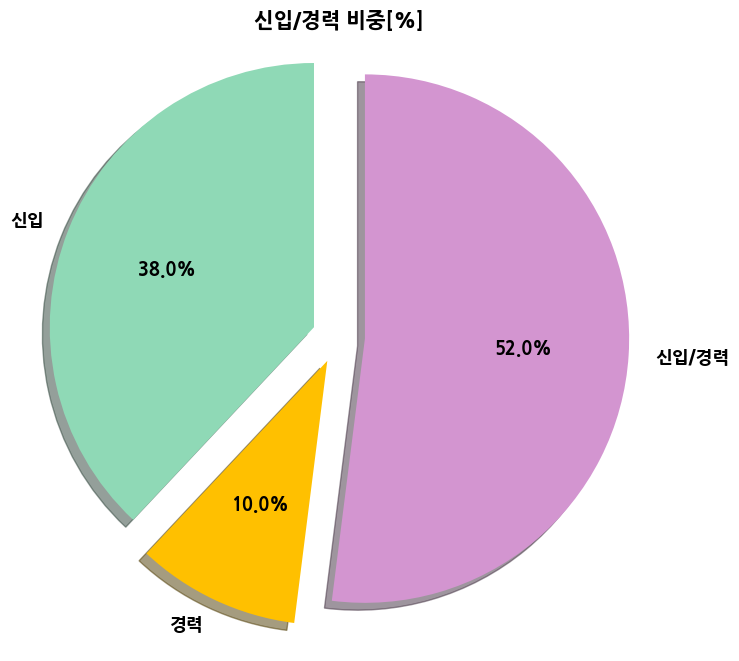

In [ ]:
name = df["기업이름"]
type = df["고용형태"]

new = (type == '신입').sum()
old = (type == '경력').sum()
both = (type == '신입/경력').sum()

# Pie plot
plt.figure(figsize=(8, 8))
explode = [0.1, 0.1, 0.1] 
colors = ['#8fd9b6', '#ffc000', '#d395d0']
plt.pie([new, old, both], labels=['신입', '경력', '신입/경력'], autopct='%1.1f%%', startangle=90, shadow=True, explode=explode, colors = colors, textprops={'weight': 'bold', 'fontsize' : 13})
plt.title('신입/경력 비중[%]', fontsize = 15, weight = 'bold')
plt.axis("equal")
plt.show()


### 잡플래닛과 (워크넷,인크루트,원티드) 합친 데이터 비교해서 기업이름 일치하는 잡플래닛값들만 불러온 결과물

- 불용어 처리 完
- dtype 변경 및 값 수정 
- 기업이름 (주) 제거
- 시각화에 적절하게 데이터프레임 가공 完

In [ ]:
# pj_innerjoin -> pj_join
df3 = pd.read_csv("/home/kkyu/amr_ws/eda/data/pj_join.csv")
df3

,기업이름,키워드,연봉,평점,분야
0,인피닉,자율주행,2542,2.1,IT
1,슈어소프트테크,딥러닝,3948,3.1,IT
2,크래프톤,딥러닝,5179,3.4,IT
3,파수,딥러닝,4298,3.1,IT
4,와디즈,딥러닝,3852,2.9,IT
...,...,...,...,...,...
105,토페스,딥러닝,2695,2.7,전기/전자/제어
106,엠투아이코퍼레이션,로봇제어,3948,3.6,전기/전자/제어
107,캔탑스,딥러닝,3755,2.7,전기/전자/제어
108,오토엘,로봇제어,5452,2.8,전기/전자/제어


### 평점,연봉,분야별 시각화

- regplot : scatter plot, regression line, confidence band(신뢰구간,대역)를 한 번에 그리는 기능
- 평점,연봉,분야 컬럼을 이용

/tmp/ipykernel_9603/1950576068.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_9603/1950576068.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipykernel_9603/1950576068.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_9603/1950576068.py:15: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



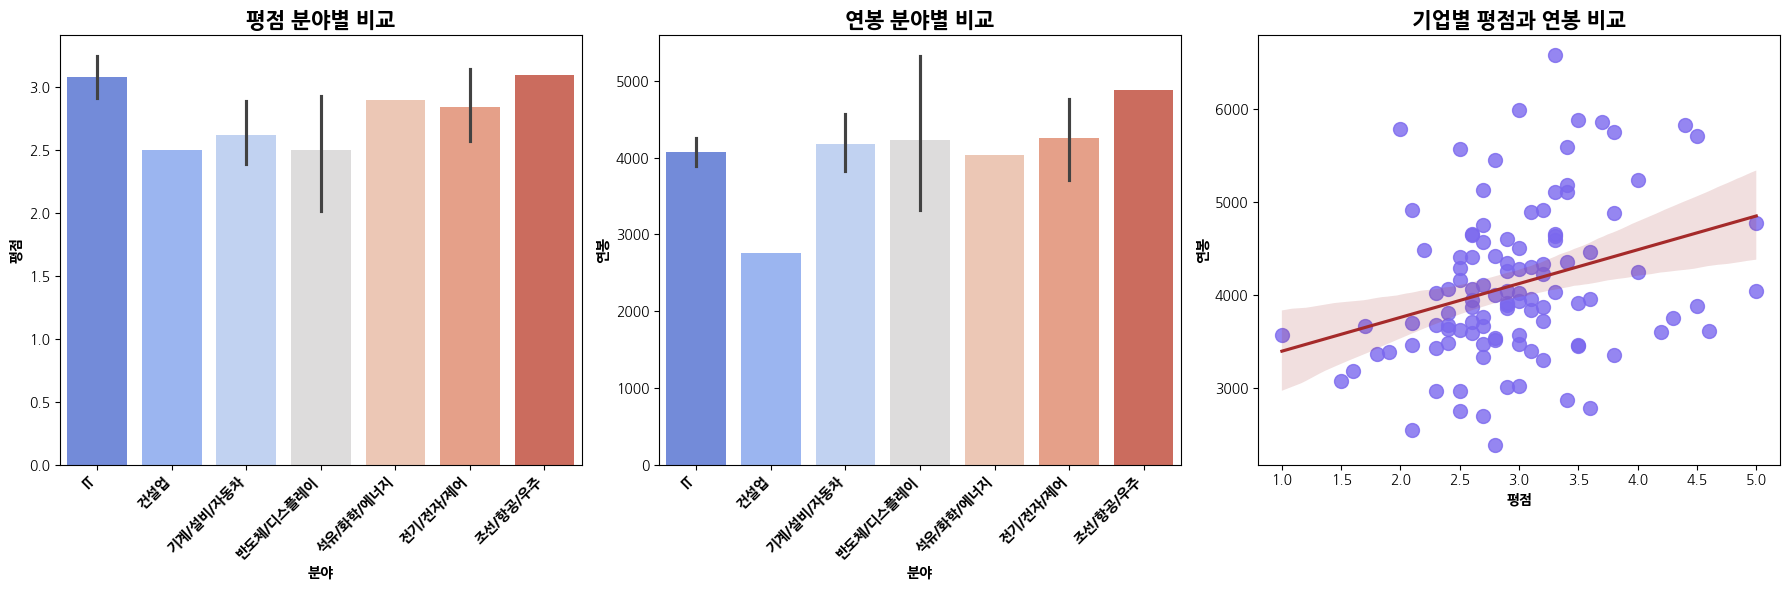

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(18, 6))

# 평점 분야별 비교
sns.barplot(x='분야', y='평점', data=df3, ax=axes[0], palette='coolwarm')
axes[0].set_title('평점 분야별 비교', weight = 'bold', fontsize = 15)
axes[0].set_xlabel('분야', weight = 'bold')
axes[0].set_ylabel('평점', weight = 'bold')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right', weight = 'bold')

# 연봉 분야별 비교
sns.barplot(x='분야', y='연봉', data=df3, ax=axes[1], palette='coolwarm')
axes[1].set_title('연봉 분야별 비교', weight = 'bold', fontsize = 15)
axes[1].set_xlabel('분야', weight = 'bold')
axes[1].set_ylabel('연봉', weight = 'bold')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right', weight = 'bold')

# 기업별 평점과 연봉 비교
sns.regplot(x='평점', y='연봉', data=df3, scatter_kws={'s': 100}, line_kws={'color': 'brown'}, ax=axes[2], color = 'mediumslateblue')
axes[2].set_title('기업별 평점과 연봉 비교', weight = 'bold', fontsize = 15)
axes[2].set_xlabel('평점', weight = 'bold')
axes[2].set_ylabel('연봉', weight = 'bold')

plt.tight_layout()
plt.show()


### 3개의 그래프 분리 

/tmp/ipykernel_12856/3347325620.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='분야', y='평점', data=df3, palette='coolwarm')


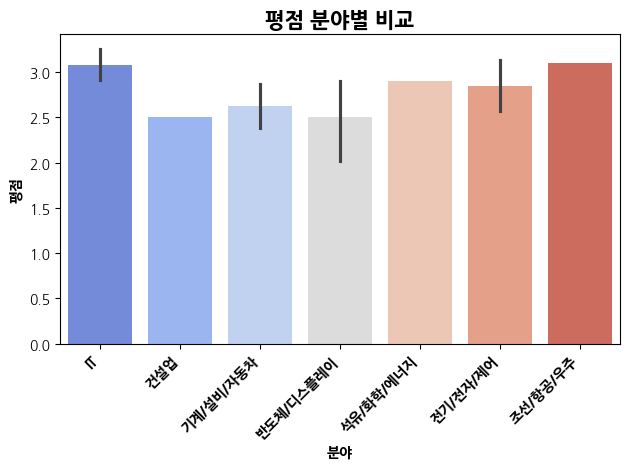

In [ ]:
sns.barplot(x='분야', y='평점', data=df3, palette='coolwarm')
plt.title('평점 분야별 비교', weight='bold', fontsize=15)
plt.xlabel('분야', weight='bold')
plt.ylabel('평점', weight='bold')
plt.xticks(rotation=45, ha='right', weight='bold')
plt.tight_layout()

plt.show()

/tmp/ipykernel_12856/513080371.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='분야', y='연봉', data=df3, palette='coolwarm')


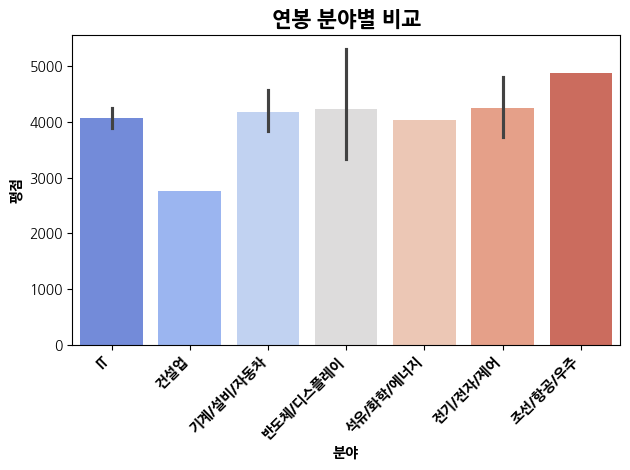

In [ ]:
sns.barplot(x='분야', y='연봉', data=df3, palette='coolwarm')
plt.title('연봉 분야별 비교', weight='bold', fontsize=15)
plt.xlabel('분야', weight='bold')
plt.ylabel('평점', weight='bold')
plt.xticks(rotation=45, ha='right', weight='bold')
plt.tight_layout()

plt.show()

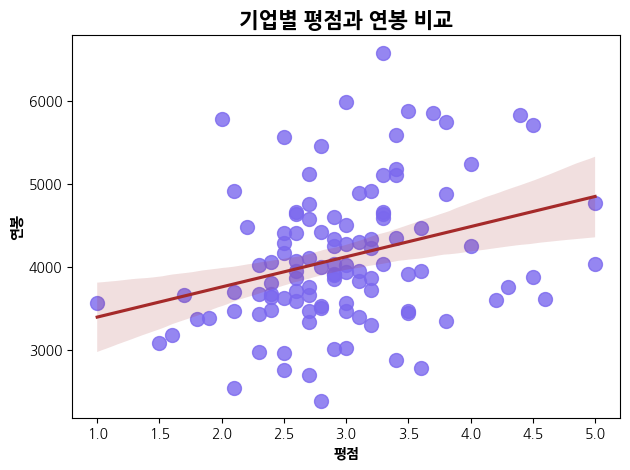

In [ ]:
sns.regplot(x='평점', y='연봉', data=df3, scatter_kws={'s': 100}, line_kws={'color': 'brown'}, color='mediumslateblue')
plt.title('기업별 평점과 연봉 비교', weight='bold', fontsize=15)
plt.xlabel('평점', weight='bold')
plt.ylabel('연봉', weight='bold')
plt.tight_layout()

plt.show()

### 기업만족도와 급여의 상관관계 by kde plot

<Figure size 1000x600 with 0 Axes>

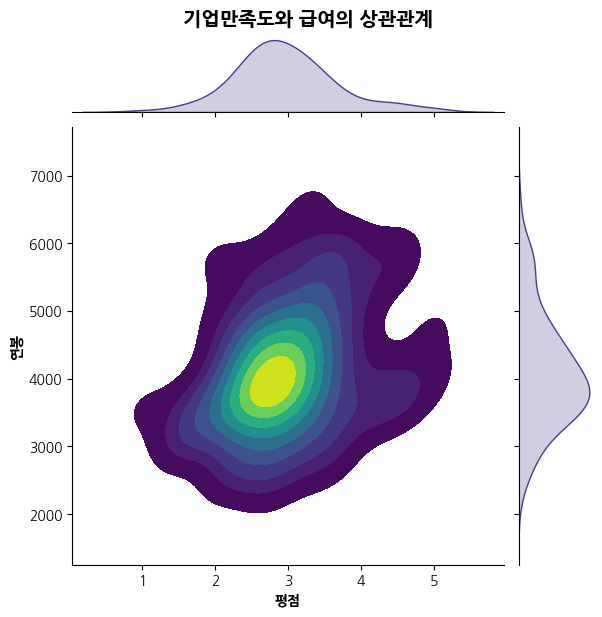

In [ ]:
plt.figure(figsize=(10, 6))
sns.jointplot(x='평점', y = '연봉', data = df3, kind = 'kde', cmap = 'viridis', color = 'darkslateblue', fill = True)
plt.suptitle('기업만족도와 급여의 상관관계', y = 1.02, weight = 'bold', fontsize = 14)
plt.xlabel('평점', weight = 'bold')
plt.ylabel('연봉', weight = 'bold')
plt.show()

